### Python script to generate figures in the main text

In [1]:
import textwrap
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sol_ivp_ as svp
from scipy.interpolate import pchip_interpolate

In [2]:
palette = sns.color_palette()
plt.style.use('default')
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['axes.edgecolor'] = (0.25, 0.25, 0.25)
plt.close('all')
# plt.rcParams['figure.dpi'] = 300
%config InlineBackend.figure_format = 'svg'

In [3]:
fixed_param, plant_data = svp.load_fix_par_and_data()

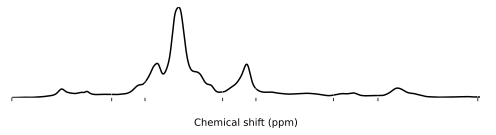

In [4]:
baldock2021_df = pd.read_excel('../data/NMR_schematic.xlsx')
baldock2021_df['avg_intensity2']=baldock2021_df['avg_intensity']+np.random.uniform(size=len(baldock2021_df))+baldock2021_df['avg_intensity'].min()
plt.rcParams['text.color'] = 'white'

plt.figure(figsize=(7, 2))
sns.lineplot(baldock2021_df, x='ppm', y='avg_intensity', color='black')
# sns.lineplot(baldock2021_df, x='ppm', y='avg_intensity2', color='w',linewidth=0.5)

plt.xlabel("Chemical shift (ppm)", color='black')
plt.xlim(0, 211)
plt.gca().axes.yaxis.set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
xticks = [0, 45, 60, 95, 110, 145, 165, 210]
plt.xticks(xticks, color='white')
for tick in xticks:
    plt.axvline(x=tick, color='white', linestyle='--', linewidth=0.5)

plt.margins(0)
plt.tight_layout()
plt.savefig("figs/nmr_schematic.svg", dpi=600, transparent=True)

### Figure 2, 3 and SI Figure S4


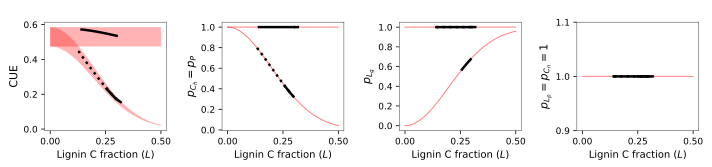

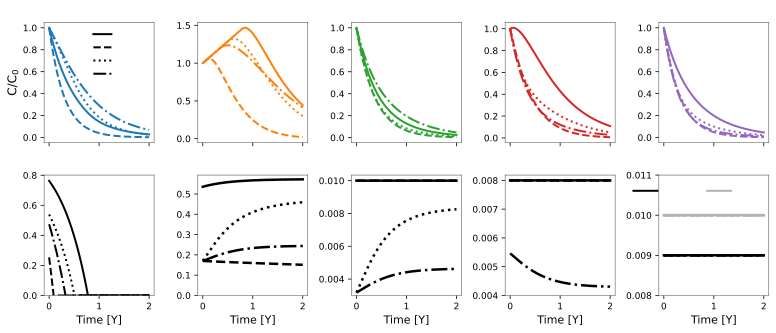

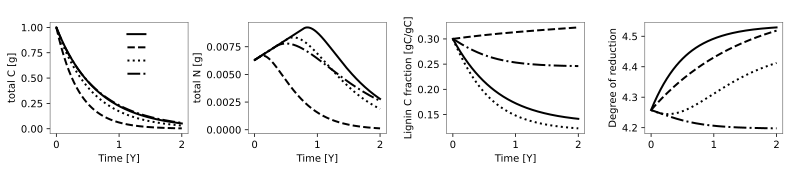

In [5]:

init_fracC = {'carbohydrate_gC': 0.0, 'protein_gC': 0.02, 'lignin_gC': 0.3, 'lipid_gC': 0.2, 'carbonyl_gC': 0.05}
init_fracC['carbohydrate_gC'] = 1 - init_fracC['protein_gC'] - \
    init_fracC['lignin_gC'] - init_fracC['lipid_gC'] - init_fracC['carbonyl_gC']

fixed_param['Inorg']=1e-5
a, b = fixed_param['a'], fixed_param['b']
guess_param = {'vh_max': 0.01, 'vp_max': 0.01, 'vlig': 0.008, 'vlip': 0.009, 'vCr': 0.01} # taken from median of estiamted pars

tsim = np.linspace(0, 365*2, 200)
Temperature = np.ones(len(tsim))*273.15

col = ['carbohydrate_gC', 'protein_gC', 'lignin_gC', 'lipid_gC', 'carbonyl_gC']
new_col = ['Carbohydrate [gC]', 'Protein [gC]', 'Lignin [gC]', 'Lipid [gC]', 'Carbonyl [gC]']
colors = palette[:len(new_col)]

lstyle = ['-','--',':','-.']
model_name = ['NPNE', 'NPWE', 'PWOE', 'PWOV']
title_str = ['Carbohydrate', 'Protein', 'Lignin', 'Lipid', 'Carbonyl']
Lt = np.arange(0, 0.5+0.01, 0.01)
CUEmax1 = svp.efficiency(np.ones(len(Lt))*3.8)
CUEmax2 = svp.efficiency(np.ones(len(Lt))*4.8)

fig2, ax2 = plt.subplots(1,4,figsize=(10,2.5),sharex=False, sharey=False)
ax2[0].fill_between(Lt, CUEmax1, CUEmax2, color='red', alpha=0.3, edgecolor=None)
ax2[0].fill_between(Lt, CUEmax1 * np.exp(-(Lt / a) ** b), CUEmax2 * np.exp(-(Lt / a) ** b), color='red', alpha=0.3, edgecolor=None)

ax2[1].plot(Lt, np.exp(-(Lt / a) ** b),linewidth=1.0,linestyle='-', color='red', alpha=0.5)
ax2[1].plot(Lt, np.ones(len(Lt)),linewidth=1.0,linestyle='-', color='red', alpha=0.5)

ax2[2].plot(Lt, 1-np.exp(-(Lt / a) ** b),linewidth=1.0,linestyle='-',color='red', alpha=0.5)
ax2[2].plot(Lt, np.ones(len(Lt)),linewidth=1.0,linestyle='-', color='red', alpha=0.5)

ax2[3].plot(Lt, np.ones(len(Lt)), linewidth=1.0,linestyle='-', color='red', alpha=0.5)


fig, ax = plt.subplots(2,5,figsize=(11,4.75),sharex=True, sharey=False)
fig.subplots_adjust(top=0.925, bottom=0.15, left=0.05,right=0.99,wspace=0.3, hspace=0.6)
a, b = fixed_param['a'], fixed_param['b']


fig3, ax3= plt.subplots(1,4,figsize=(11,2.5),sharex=False, sharey=False)
ax3=ax3.flatten()
k=0
sttr= "ABCDEFGH"
for ls, mdnam in zip(lstyle,model_name):
    if mdnam =='NPNE':
        df = svp.litter_decay_model(tsim, np.array(list(init_fracC.values())), guess_param.values(), fixed_param,
                                     adapt_flag='N-Retention', protection=False, CUEflag= False,voflag=False)

        L = df['lignin_gC']/df[col].sum(axis=1)
        p_func_Ch=p_func_P=p_func_lig = np.ones(len(df))
    elif mdnam =='NPWE':
        df = svp.litter_decay_model(tsim, np.array(list(init_fracC.values())), guess_param.values(), fixed_param,
                                adapt_flag='N-Retention', protection=False, CUEflag= True,voflag=False)
        L = df['lignin_gC']/df[col].sum(axis=1)
        p_func_Ch=p_func_P=p_func_lig = np.ones(len(df))
    elif mdnam =='PWOE':
        df = svp.litter_decay_model(tsim, np.array(list(init_fracC.values())), guess_param.values(), fixed_param,
                                adapt_flag='N-Retention', protection=True, CUEflag= True,voflag=False)
        L = df['lignin_gC']/df[col].sum(axis=1)
        p_func_Ch=p_func_P=np.exp(-(L / a)**b)
        p_func_lig = np.ones(len(df))
    elif mdnam=='PWOV':
        df = svp.litter_decay_model(tsim, np.array(list(init_fracC.values())), guess_param.values(), fixed_param,
                                adapt_flag='N-Retention', protection=True, CUEflag= True,voflag=True)
        L = df['lignin_gC']/df[col].sum(axis=1)
        p_func_Ch=p_func_P=np.exp(-(L / a)**b)
        p_func_lig = 1-np.exp(-(L / a)**b)
    else: 
        pass
        
    df = df.rename(columns=dict(zip(col, new_col)))
    for n, column in enumerate(new_col[0:5]):
        ax[0,n].plot(df['time']/365, df[column]/df[column].iloc[0], label=mdnam, linewidth=2,linestyle=ls, color=palette[n])
        # ax[1,0].plot(df['time'], df['DR'], label=mdnam, linewidth=2.5,linestyle=ls, color=palette[n])
        ax[0,n].set_title('('+sttr[n]+') '+title_str[n],fontsize=12)
    
    
    ax[1,0].plot(df['time']/365, df['ETA'], label=mdnam, linewidth=2,linestyle=ls, color='black')
    ax[1,0].set_title(r'(F) $\eta$',fontsize=12)

    ax[1,1].plot(df['time']/365, df['CUE'], label=mdnam, linewidth=2.5,linestyle=ls, color='black')
    ax[1,1].set_title('(G) CUE',fontsize=12)
    
    vh = p_func_Ch*guess_param['vh_max']
    ax[1,2].plot(df['time']/365, vh, label=mdnam, linewidth=2.5,linestyle=ls, color='black')
    ax[1,2].set_title(r'(H) $v_{C_h}=v_{P}$',fontsize=12)
    
    vLg = p_func_lig*guess_param['vlig']
    ax[1,3].plot(df['time']/365, vLg, label=mdnam, linewidth=2.5,linestyle=ls, color='black')
    ax[1,3].set_title(r'(I) $v_{L_g}$',fontsize=12)

    vLp= np.ones(len(df))*guess_param['vlip']
    vCr= np.ones(len(df))*guess_param['vCr']
    ax[1,4].plot(df['time']/365, vLp, label=mdnam, linewidth=2.5,linestyle=ls, color='black')
    ax[1,4].plot(df['time']/365, vCr, label=mdnam, linewidth=2.5,linestyle=ls, color=[.7,.7,.7])
    ax[1,4].set_title(r'(J) $v_{L_p}, v_{C_n}$',fontsize=12)

    ax2[0].plot(L, df['CUE'], label=mdnam, linewidth=2.5,linestyle=ls, color='black')
    ax2[0].set_title('(A) CUE',fontsize=12)
    
    ax2[1].plot(L, p_func_Ch, label=mdnam, linewidth=2.5,linestyle=ls, color='black')
    ax2[1].set_title(r'(B) $p_{C_h}=p_{P}$',fontsize=12)
    
    ax2[2].plot(L, p_func_lig, label=mdnam, linewidth=2.5,linestyle=ls, color='black')
    ax2[2].set_title(r'(C) $p_{L_g}$',fontsize=12)

    ax2[3].plot(L, np.ones(len(df)), label=mdnam, linewidth=2.5,linestyle=ls, color='black')
    ax2[3].set_title(r'(D) $p_{L_p}=p_{C_n}=1$',fontsize=12)
    
    ax3[0].plot(df['time']/365, df['totCg'], label=mdnam, linewidth=2,linestyle=ls, color='black')
    ax3[1].plot(df['time']/365, df['totNg'], label=mdnam, linewidth=2,linestyle=ls, color='black')
    ax3[2].plot(df['time']/365, df['Lignin [gC]']/df['totCg'], label=mdnam, linewidth=2,linestyle=ls, color='black')
    ax3[3].plot(df['time']/365, df['DR'], label=mdnam, linewidth=2,linestyle=ls, color='black')

    k=k+1

# fix axes for ax3
for i in range(3):
    ax3[i].set_xlabel(r'Time [Y]', fontsize=10)
    ax2[i].tick_params(axis='both', labelsize=9)

ax3[0].set_ylabel(r'total C [g]', fontsize=10)
ax3[1].set_ylabel(r'total N [g]', fontsize=10)
ax3[2].set_ylabel(r'Lignin C fraction [gC/gC]', fontsize=10)
ax3[3].set_ylabel(r'Degree of reduction', fontsize=10)
ax3[0].legend(fontsize=9, loc="upper right", frameon=False)
abcd= ['A','B','C','D']
for i in range(4):
    ax3[i].set_title('('+abcd[i]+')',fontsize=12)
fig3.tight_layout()
fig3.savefig('figs/Figure3_SI.svg', bbox_inches='tight')


# fix axes for ax2
ax2[0].set_title('(A)',fontsize=12)
ax2[1].set_title(r'(B)',fontsize=12)
ax2[2].set_title(r'(C)',fontsize=12)
ax2[3].set_title(r'(D)',fontsize=12)

ax2[0].set_ylabel('CUE',fontsize=11)
ax2[1].set_ylabel(r'$p_{C_h}=p_{P}$',fontsize=11)
ax2[2].set_ylabel(r'$p_{L_g}$',fontsize=11)
ax2[3].set_ylabel(r'$p_{L_p}=p_{C_n}=1$',fontsize=11)


for i in range(4):
    ax2[i].set_xlabel(r'Lignin C fraction ($L$)', fontsize=10)
    ax2[i].set_xticks([0, 0.25,  0.5])
    ax2[i].tick_params(axis='both', labelsize=9)
    # ax2[i].set_xticklabels(['0', '0.1', '0.2', '0.3', '0.4', '0.5'])
ax2[3].set_ylim(0.95,1.05)
ax2[3].set_yticks([0.9,1,1.1])

fig2.tight_layout()
fig2.savefig('figs/Model_scenario.svg', bbox_inches='tight')

# fix axes for ax

# ax[0,n].set_xlabel('Time [Y]',fontsize=11)
for i in range(5):
    ax[1,i].set_xlabel('Time [Y]',fontsize=11)

ax[0,0].set_ylabel(r'C/C$_0$',fontsize=12)
ax[1,2].set_ylim(bottom =0.003)
ax[1,3].set_ylim(bottom =0.004)
ax[1,4].set_ylim(bottom=0.008,top= 0.011)
ax[1,4].set_yticks([0.008,0.009,0.01,0.011])
# Add legend handles for v_{L_p} and v_{C_n} to ax[1,4]
line1 = ax[1,4].plot(np.nan, np.nan, label=r"$v_{L_p}$", linewidth=2, linestyle='-', color='black')
line2 = ax[1,4].plot(np.nan, np.nan, label=r"$v_{C_n}$", linewidth=2, linestyle='-', color=[.7, .7, .7])
ax[1,4].legend(handles=[line1[0], line2[0]], fontsize=12,ncol=2, loc="upper right", frameon=False)
ax[1,0].set_ylim(bottom=0)
ax[1,1].set_ylim(bottom=0)
# ax[0,2].legend(fontsize=12, frameon=True,loc='upper center', bbox_to_anchor=(1.5, 1))
pts=[]
for ls, mdnam in zip(lstyle,model_name):
    pt=ax[0,0].plot(np.nan, np.nan,label=mdnam, linewidth=2,linestyle=ls, color='black')
    pts.append(pt[0])
ax[0,0].legend(pts,model_name,fontsize=9, loc="upper right", frameon=False)

for axx in ax.flatten():
    axx.tick_params(axis='both', labelsize=9)
# ax[0,2].legend(fontsize=11, frameon=False,loc='best',ncol=1)  

fig.tight_layout()
# plt.savefig('figs/Figure3.png', dpi=600, bbox_inches='tight')
fig.savefig('figs/Figure3_alt.svg', bbox_inches='tight')

### load model-data, estimated parameters and model performance dataframes

In [6]:
# Load and merge model-data, estimated parameters, and model performance dataframes for different N limitation strategies

fixed_param, plant_data = svp.load_fix_par_and_data()
plant_data['ID'] = plant_data['Study']+"_"+plant_data['Species']
temp_plant = plant_data[plant_data['time day']==0].reset_index(drop=True)

Nlimitation_strategy = ['N-Retention', 'Flexible CUE']

dfname = ['False_vo_False_CUE_False', 'False_vo_False_CUE_True',
          'True_vo_False_CUE_True', 'True_vo_True_CUE_True']

df_model_data = pd.DataFrame()
df_estpar_local = pd.DataFrame()
df_perf_matrix = pd.DataFrame()

model_name = ['NPNE', 'NPWE', 'PWOE', 'PWOV']
for nstrag in Nlimitation_strategy:
    str_name = 'tables/'+nstrag+'/Local_model_data_protection_'
    str1 = 'tables/'+nstrag+'/Local_model_data_protection_'
    str2 = 'tables/'+nstrag+'/Local_estpar_protection_'
    str3 = 'tables/'+nstrag+'/Local_perf_matrix_protection_'
    for nam, mdnam in zip(dfname, model_name):
        
        temp_model_data = pd.read_excel(str1+nam+'.xlsx')
        temp_model_data['model'] = mdnam
        temp_model_data['Nlimitation_strategy'] = nstrag
        df_model_data = pd.concat([df_model_data, temp_model_data])

        temp_estpar = pd.read_excel(str2+nam+'.xlsx')
        temp_estpar['model'] = mdnam
        temp_estpar['Nlimitation_strategy'] = nstrag
        df_estpar_local = pd.concat([df_estpar_local, temp_estpar])
        df_estpar_local['Climate'] = temp_plant['Climate']
               
        temp_perf_matrix = pd.read_excel(str3+nam+'.xlsx')
        temp_perf_matrix['model'] = mdnam
        temp_perf_matrix['Nlimitation_strategy'] = nstrag
        df_perf_matrix = pd.concat([df_perf_matrix, temp_perf_matrix])

sum(df_perf_matrix['carbohydrate_gC_r2'] < 0)
sum(df_perf_matrix['protein_gC_r2'] < 0)
sum(df_perf_matrix['lignin_gC_r2'] < 0)
sum(df_perf_matrix['lipid_gC_r2'] < 0)
sum(df_perf_matrix['carbonyl_gC_r2'] < 0)

# mapping = {'N-Retention': 'NR', 'Flexible CUE': 'CUE'}
# df_perf_matrix['Nlimitation_strategy'] = df_perf_matrix['Nlimitation_strategy'].map(mapping)
df_perf_matrix['model_nstrat'] = df_perf_matrix['model']+":"+df_perf_matrix['Nlimitation_strategy']

pa_col = ['carbohydrate_gC', 'protein_gC', 'lignin_gC', 'lipid_gC', 'carbonyl_gC', 'DR', 'totCg', 'totNg']
new_col = ['Carbohydrate [gC]', 'Protein [gC]', 'Lignin [gC]', 'Lipid [gC]', 'Carbonyl [gC]', 'DR', 'totCg', 'totNg']

mapping = dict(zip(pa_col, new_col))
df_model_data['pool'] = df_model_data['pool'].map(mapping)

df_estpar_local['ID'] = df_estpar_local['Study']+"_"+df_estpar_local['Species']
# df_perf_matrix['ID'] = df_perf_matrix['Study']+"_"+df_perf_matrix['Species']

df_estpar_local

temp_col = ['carbohydrate_gC_r2', 'protein_gC_r2', 'lignin_gC_r2','lipid_gC_r2', 'carbonyl_gC_r2','carbohydrate_gC_rmse',
       'protein_gC_rmse', 'lignin_gC_rmse', 'lipid_gC_rmse', 'carbonyl_gC_rmse','overall_r2', 'overall_rmse']

df_estpar_local  = pd.concat((df_estpar_local,df_perf_matrix[temp_col]), axis=1)
df_estpar_local.to_excel('tables/df_estbar_local_merged.xlsx', index=False)



### Figure4 plotting example data model dynamic comparison across five litter types 


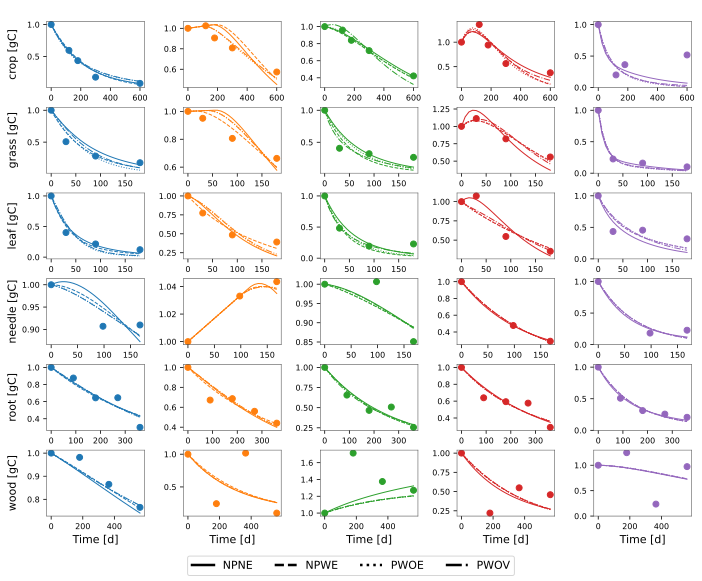

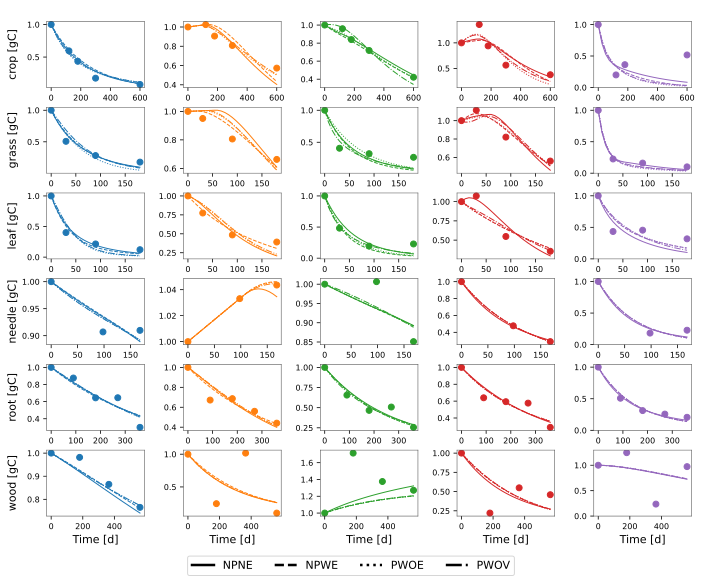

In [7]:
PFT = ['crop', 'grass', 'leaf', 'needle', 'root', 'wood']
idtemp = ['Li et al 2020_sandy loam_Wheat', 'Bonanomi et al 2013_A. mauritanicus', 'Bonanomi et al 2013_A. unedo',
          'Almendros et al. 2000_Pinus radiata', 'Wang et al 2013_M. macclurei_fine roots', 'Mathers et al., 2007_Mulga twigs']

temp = plant_data[(plant_data['ID'].isin(idtemp)) & (plant_data['time day'] == 0)]
temp[['Species', 'C:N']]

col = ['carbohydrate_gC', 'protein_gC', 'lignin_gC', 'lipid_gC', 'carbonyl_gC']
nSP, npool = len(PFT), 5

lstyle = ['-', '--', ':', '-.']

for adapt_flag in ['N-Retention','Flexible CUE']:
# for adapt_flag in ['N-Retention']: 

    fig, ax = plt.subplots(nSP, npool, figsize=(9.75, 8), sharex=False, sharey=False)
    fig.subplots_adjust(top=0.97, bottom=0.11, left=0.07, right=0.99, wspace=0.4, hspace=0.3)

    for i, idx in enumerate(idtemp):
        data = plant_data[plant_data["ID"] == idx].reset_index(drop=True)
        if pd.isna(data['carbohydrate_gC'].iloc[0]):
            data = data.iloc[1:].reset_index(drop=True)
            data['time day'] = data['time day'] - data['time day'][0]
    
        dt = data['time day'][1] - data['time day'][0]
        if (np.sum(~np.isnan(data['totNg'])) > np.sum(~np.isnan(data['protein_gN']))):
            Imax = np.nanmax(np.gradient(data['totNg'], dt))
        else:
            Imax = np.nanmax(np.gradient(data['protein_gN'], dt))
    
        if Imax > 0:
            fixed_param['Inorg'] = Imax
    
        init_fracC = data[['carbohydrate_gC', 'protein_gC', 'lignin_gC', 'lipid_gC', 'carbonyl_gC']].iloc[0].values
    
        for j, column in enumerate(col):
            ax[i, j].scatter(data['time day'], data[column]/data[column].iloc[0], linewidth=1.0, color=palette[j])
            ax[i, j].tick_params(axis='both', labelsize=8)
    
        tsim = np.linspace(data['time day'].iloc[0], data['time day'].iloc[-1], 25)
        Temperature = pchip_interpolate(data['time day'], data['Incubtation T']+273.15, tsim)
        for ls, mdnam in zip(lstyle, model_name):
            par = df_estpar_local[(df_estpar_local["model"] == mdnam) & (df_estpar_local["ID"] == idx) & (df_estpar_local['Nlimitation_strategy']==adapt_flag)]
            guess_param = par[['vh_max', 'vp_max', 'vlig', 'vlip', 'vCr']].values[0]

            if mdnam == 'NPNE':
                df = svp.litter_decay_model(tsim, init_fracC, guess_param, fixed_param,
                                        adapt_flag=adapt_flag, protection=False, CUEflag=False, voflag=False)
            elif mdnam == 'NPWE':
                df = svp.litter_decay_model(tsim, init_fracC, guess_param, fixed_param,
                                        adapt_flag=adapt_flag, protection=False, CUEflag=True, voflag=False)
            elif mdnam == 'PWOE':
                df = svp.litter_decay_model(tsim, init_fracC, guess_param, fixed_param,
                                        adapt_flag=adapt_flag, protection=True, CUEflag=True, voflag=False)
            elif mdnam == 'PWOV':
                df = svp.litter_decay_model(tsim, init_fracC, guess_param, fixed_param,
                                        adapt_flag=adapt_flag, protection=True, CUEflag=True, voflag=True)
            else:
                pass
    
            for j, column in enumerate(col):
                ax[i, j].plot(df['time'], df[column]/df[column].iloc[0], label=mdnam,
                              linewidth=1.0, linestyle=ls, color=palette[j])
                # ax[i,j].plot(df['time'], df[column], label=mdnam, linewidth=1.0,linestyle=ls, color=palette[j])
    
        ax[i, j].set_ylim(bottom=0)
        ax[i, 0].set_ylabel(PFT[i]+' [gC]', fontsize=11)
    
    legstr = ['Carbohydrate', 'Protein', 'Lignin', 'Lipid', 'Carbonyl']
    for j, column in enumerate(legstr):
        ax[0, j].set_title(column, fontsize=11)
        ax[nSP-1, j].set_xlabel('Time [d]', fontsize=11)
    
    # leg = ax[nSP-1, 4].legend(loc='lower right', fontsize=12, frameon=True, ncol=4, 
    #                           bbox_to_anchor=(-1.1,-0.5))
    
    h, l = ax[nSP-1, 4].get_legend_handles_labels()
    leg = fig.legend(h, l, loc='lower center', ncol=4,fontsize=11)
    for text in leg.get_texts():
        text.set_color('black')

    for line in leg.get_lines():
        line.set_linewidth(2.5)  # Set the desired thickness for legend lines
        line.set_color('black')  # Correct

    fig.align_ylabels(ax[:, 0])
    
    # fig.tight_layout()
    fig.savefig("figs/Figure4"+adapt_flag+".svg")
    


### Supplementary scatter plot model in row and OC in colum
### scatter plot for data model comparsion from bpoth N strategy from local optimization


N-Retention
Flexible CUE


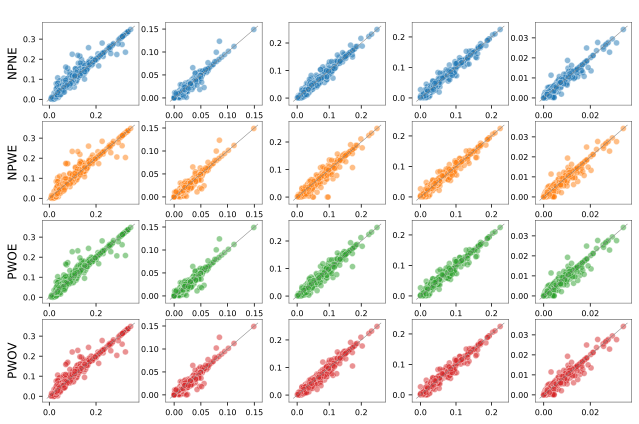

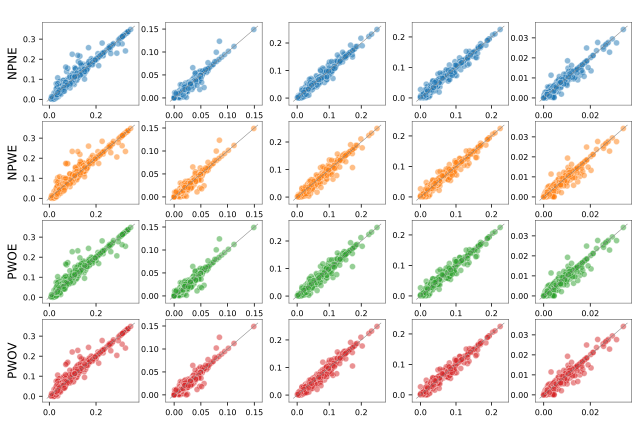

In [8]:
color_palette = sns.color_palette(n_colors=4)

# fig.subplots_adjust(top=0.9, bottom=0.1, left=0.1,right=0.99,wspace=0.2, hspace=0.35)

new_col = ['Carbohydrate [gC]', 'Protein [gC]', 'Lignin [gC]', 'Lipid [gC]', 'Carbonyl [gC]']

for nstrag in df_model_data['Nlimitation_strategy'].unique():
    fig, ax = plt.subplots(4, 5, figsize=(9, 6), sharex=False, sharey=False)
    for i, mdnam in enumerate(model_name):
        temp = df_model_data[(df_model_data["model"] == mdnam) & (df_model_data['Nlimitation_strategy'] == nstrag)]
        for j, col in enumerate(new_col):
            sns.scatterplot(temp[temp["pool"] == col], x="obs", y="sim", alpha=0.5,
                            legend=False, color=color_palette[i], ax=ax[i, j])
            ax[i, j].plot(ax[i, j].get_xlim(), ax[i, j].get_xlim(), linewidth=0.5, color='grey')
            ax[i, j].set_xlabel("")
            ax[i, j].set_ylabel("")
            ax[i, j].tick_params(axis='both', labelsize=8)

    for axx, t_str in zip(ax[0, :], ['Carbohydrate', 'Protein', 'Lignin', 'Lipid', 'Carbonyl']):
        axx.set_title(t_str)

    for axx, t_str in zip(ax[:, 0], model_name):
        axx.set_ylabel(t_str, fontsize=12)
    print(nstrag)

    # fig, ax = plt.subplots(4, 5, figsize=(9, 6), sharex=False, sharey=False)
    # Use suptitle and set common axis labels using fig.text for compatibility with older matplotlib versions
    # fig.suptitle(f'Observed vs Simulated [gC] for Each Model and Compound ({nstrag})', fontsize=14)

    # fig.text(0.5, 0.04, 'Observed [gC]', ha='center', va='center', fontsize=12)
    # fig.text(0.06, 0.5, 'Simulated [gC]', ha='center', va='center', rotation='vertical', fontsize=12)
    
    plt.tight_layout(h_pad=0.2, w_pad=0.2)
    plt.savefig("figs/data_model_scatter_plot"+nstrag+".svg", bbox_inches='tight')


### Figure 5 plot overall rmse and r2

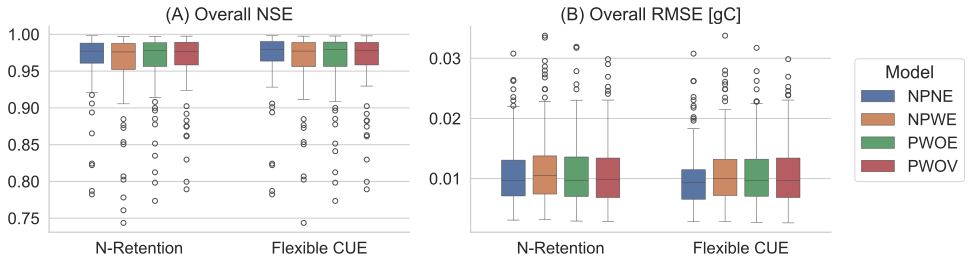

In [9]:
df_melt = pd.melt(df_estpar_local, id_vars=['Nlimitation_strategy','model'],
                  value_vars=['overall_r2', 'overall_rmse'],
                  var_name='metric', value_name='value')

sns.set_theme(style='whitegrid', font_scale=1.5)

# Create the boxplot with improved aesthetics
g = sns.catplot(
    data=df_melt,
    kind="box",
    x="Nlimitation_strategy",
    y="value",
    hue="model",
    col="metric",
    sharey=False,
    height=4,
    aspect=1.5,
    palette=sns.color_palette(n_colors=4),
    width=0.7, gap=.25,
    linewidth=0.5, boxprops=dict(alpha=1)
)

# Set axis and title labels
g.set_axis_labels("", "")
g.set_titles(col_template="")

# Set y-axis labels for each metric
for ax, metric in zip(g.axes.flat, df_melt['metric'].unique()):
    if metric == "overall_r2":
        # ax.set_ylabel("Overall NSE")
        ax.set_title("(A) Overall NSE")        
    elif metric == "overall_rmse":
        # ax.set_ylabel("Overall RMSE")
        ax.set_title("(B) Overall RMSE [gC]")

g._legend.set_title("Model")
g._legend.set_bbox_to_anchor((1, 0.5))
g._legend.set_frame_on(True)
# for text in g._legend.get_texts():
#     text.set_fontsize(12)
g.tight_layout()
# plt.show()
plt.savefig("figs/Figure 5 overall rmse and r2.svg", dpi=300, bbox_inches='tight')

### Figure 6 boxplot for model performance NSE and RMSE

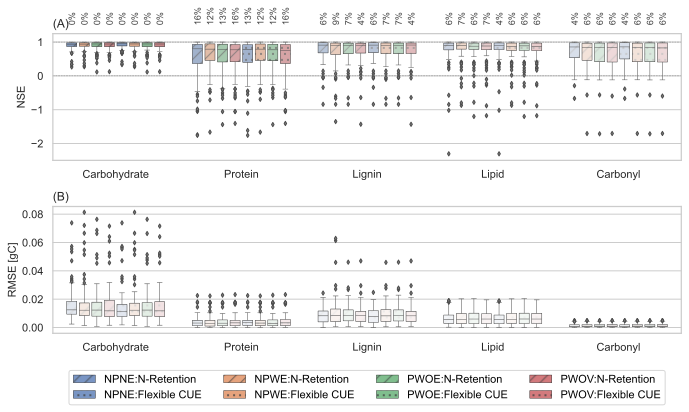

In [10]:

sns.set_theme(style='whitegrid', font_scale=1.0)

id_vars = ['Study', 'Species', 'Csource', 'model_nstrat']
col = ['Study', 'Species', 'Csource', 'model_nstrat', 'carbohydrate_gC_r2', 'protein_gC_r2', 'lignin_gC_r2',
       'lipid_gC_r2', 'carbonyl_gC_r2']
df_perf_matrix_melt1 = pd.melt(df_perf_matrix[col], id_vars=id_vars,
                          var_name='compound', value_name='NSE')
df_perf_matrix_melt1['metric_name'] = 'Nash–Sutcliffe efficiency (NSE)'

col = ['Study', 'Species', 'Csource', 'model_nstrat', 'carbohydrate_gC_rmse',
       'protein_gC_rmse', 'lignin_gC_rmse', 'lipid_gC_rmse', 'carbonyl_gC_rmse']
df_perf_matrix_melt2 = pd.melt(df_perf_matrix[col], id_vars=id_vars,
                          var_name='compound', value_name='RMSE')
df_perf_matrix_melt2['metric_name'] = 'RMSE'

compounds = ['carbohydrate_gC_r2', 'protein_gC_r2', 'lignin_gC_r2', 'lipid_gC_r2', 'carbonyl_gC_r2']
model_nstrats = df_perf_matrix_melt1['model_nstrat'].unique()
compound_order = ['Carbohydrate', 'Protein', 'Lignin', 'Lipid', 'Carbonyl']
num_strats = len(model_nstrats)



color_palette = sns.color_palette(n_colors=4) * 2  # Repeat the same colors twice

fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=False, sharey=False)
# fig.subplots_adjust(top=0.9, bottom=0.25, left=0.06,right=0.99,wspace=0.0, hspace=0.35)
ax = ax.flatten()
txt = "ABCDEF"
i = 0
# sum(df_perf_matrix_melt['r2_value']<0)

g1 = sns.boxplot(x='compound', y='NSE', data=df_perf_matrix_melt1, width=0.8, hue='model_nstrat', legend=False,
                 palette=color_palette, linewidth=0.5, boxprops=dict(alpha=0.75), gap=.2,
                 flierprops=dict(marker='d', markersize=3, markerfacecolor='grey'), ax=ax[0])

# Add text for the fraction of data points with NSE < 0
# Manually compute x positions (grouped by compound, offset by hue)
for i_c, compound in enumerate(compounds):
    for i_s, strat in enumerate(model_nstrats):
        subset = df_perf_matrix_melt1[
            (df_perf_matrix_melt1['compound'] == compound) &
            (df_perf_matrix_melt1['model_nstrat'] == strat)
        ]
        frac = (subset['NSE'] < 0).mean()
        xpos = i_c + (i_s - num_strats / 2) * 0.1+0.025   # Adjust spacing per hue
        ax[0].text(xpos, 1.5, f"{frac:.0%}", ha='left', va='bottom', fontsize=9, color=(0.25,0.25,0.25), rotation=90)

ax[0].set_ylim(-2.5,1.25)
ax[0].axhline(y=0, color='grey', linestyle='--', linewidth=0.5)
ax[0].axhline(y=1, color='grey', linestyle='--', linewidth=0.5)
ax[0].set_xlabel("")
ax[0].set_title("(A)", loc='left')
ax[0].set_ylabel('NSE', fontsize=11)
ax[0].set_xticks([0, 1, 2, 3, 4])
ax[0].set_xticklabels(['Carbohydrate', 'Protein', 'Lignin', 'Lipid', 'Carbonyl'], fontsize=11)
# ax[0].set_xlim(left=None, right=ax[0].get_xlim()[1] * 0.98)

g2 = sns.boxplot(x='compound', y='RMSE', data=df_perf_matrix_melt2, width=0.8, hue='model_nstrat', legend=True,
                 palette=color_palette, linewidth=0.5, boxprops=dict(alpha=0.75), gap=.2,
                 flierprops=dict(marker='d', markersize=3, markerfacecolor='grey'), ax=ax[1])

ax[1].set_xlabel("")
ax[1].set_title("(B)", loc='left')
ax[1].set_ylabel("RMSE [gC]", fontsize=11)
ax[1].set_xticks([0, 1, 2, 3, 4])
ax[1].set_xticklabels(['Carbohydrate', 'Protein', 'Lignin', 'Lipid', 'Carbonyl'],
                      fontsize=11)  # Set custom x-axis labels
# ax[1].set_xlim(left=None, right=ax[1].get_xlim()[1] * 0.99)

hatches = ['//', '//', '//', '//', '//',
           '//', '//', '//', '//', '//',
           '//', '//', '//', '//', '//',
           '//', '//', '//', '//', '//',
           '..',  '..',  '..',  '..', '..',
           '..',  '..',  '..',  '..', '..',
           '..',  '..',  '..',  '..', '..',
           '..',  '..',  '..',  '..', '..']
for ax in [g1, g2]:
    # ax=g1
    patches = [patch for patch in ax.patches if type(patch) == mpl.patches.PathPatch]
    for k in range(len(patches)):
        ax.patches[k].set_hatch(hatches[k])
        ax.patches[k].set_edgecolor('black')

# plt.legend(loc='upper right', ncol=2)

hatches = ['//', '//', '//', '//', '..',  '..',  '..',  '..']
legend_handles = [mpl.patches.Patch(facecolor=fc, edgecolor='black', hatch=h, label=kind, linewidth=0.5, alpha=0.75)
                  for h, kind, fc in zip(hatches, df_perf_matrix_melt2['model_nstrat'].unique(), color_palette)]

# # Display legend
plt.legend(handles=legend_handles, loc='upper center', ncol=4, bbox_to_anchor=(0.5, -0.25),
           frameon=True, fontsize=11, labelcolor='black')
# # Get handles and labels from the plot
_, labels = ax.get_legend_handles_labels()

def reorder_legend(handles, labels, ncol):
    return [handles[i::ncol] for i in range(ncol)], [labels[i::ncol] for i in range(ncol)]

# Apply reordering
ncol =4  # Number of columns in the legend
new_handles, new_labels = reorder_legend(legend_handles, labels, ncol)

# Flatten the lists
new_handles = [item for sublist in new_handles for item in sublist]
new_labels = [item for sublist in new_labels for item in sublist]

# Create legend with reordered handles and labels
plt.legend(new_handles, new_labels, ncol=ncol, loc='upper center',
           bbox_to_anchor=(0.5, -0.25), frameon=True, fontsize=11, labelcolor='black')
plt.tight_layout(h_pad=1)
plt.savefig("figs/Figure5.svg", bbox_inches='tight')



### Figure 7 boxplot of parameter range for N-Retention and Flexible CUE

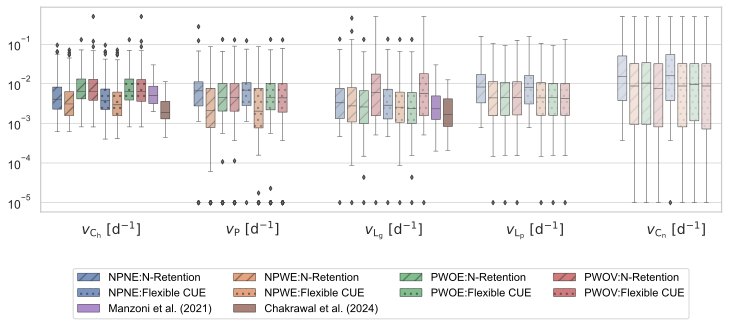

In [11]:
par_names = ['vh_max', 'vp_max', 'vlig', 'vlip', 'vCr']
new_col = [r'$v_{\mathrm{C_h}} \ \mathrm{[d^{-1}]}$',
           r'$v_{\mathrm{P}} \ \mathrm{[d^{-1}]}$',
           r'$v_{\mathrm{L_g}} \ \mathrm{[d^{-1}]}$',
           r'$v_{\mathrm{L_p}} \ \mathrm{[d^{-1}]}$',
           r'$v_{\mathrm{C_n}} \ \mathrm{[d^{-1}]}$']


# Load the data from the Excel file into a DataFrame. Convert annual rates to daily rates for 'VH' and 'VO'. 
# Filter the DataFrame to keep only rows where the 'Resouce use strategy' is 4. 
# Melt the DataFrame to create a long-form DataFrame suitable for plotting and add a new column to specify the model source.

manzoni2021_df = pd.read_excel(
    '../data/Data_Sheet_1_Modeling Microbial Adaptations to Nutrient Limitation During Litter Decomposition.XLSX')
manzoni2021_df['vh_max'] = manzoni2021_df['VH (1/y)'] / 365
manzoni2021_df['vlig'] = manzoni2021_df['VO (1/y)'] / 365
manzoni2021_df_NRetention = manzoni2021_df[manzoni2021_df['Resouce use strategy (1 to 4 as in Fig. 1B-E)']==4]
manzoni2021_df_melt= pd.melt(manzoni2021_df_NRetention[[ 'vh_max', 'vlig']],var_name='par_name', value_name='par_val')
manzoni2021_df_melt['model_nstrat'] = 'Manzoni et al. (2021)'


chakrawal2024_df = pd.read_excel('../data/Chakrawal_et_al_2024_NP.xlsx')
col_rename = {'vhmax':'vh_max', 'avg_vo':'vlig'}
chakrawal2024_df = chakrawal2024_df.rename(columns=col_rename)
chakrawal2024_df_melt = pd.melt(chakrawal2024_df[[ 'vh_max', 'vlig']],var_name='par_name', value_name='par_val')
chakrawal2024_df_melt['model_nstrat'] = 'Chakrawal et al. (2024)'



df_estpar_local_copy = df_estpar_local.copy()
df_estpar_local_copy['model_nstrat'] = df_estpar_local_copy['model']+":"+df_estpar_local_copy['Nlimitation_strategy']

col = ['model_nstrat', 'vh_max', 'vp_max', 'vlig', 'vlip', 'vCr']
df_estpar_local_melt = pd.melt(df_estpar_local_copy[col], id_vars='model_nstrat',
                          var_name='par_name', value_name='par_val')

par_melt_final = pd.concat((df_estpar_local_melt,manzoni2021_df_melt,chakrawal2024_df_melt))

color_palette = sns.color_palette(n_colors=4) * 2  # Repeat the same colors twice
color_palette.extend([(0.58, 0.40, 0.74), (0.55, 0.34, 0.29)])  # Add rounded brown and navy blue to the palette

fig, ax = plt.subplots(1, 1, figsize=(10.25, 4.5), sharex=False, sharey=False)
g1 = sns.boxplot(x='par_name', y='par_val', data=par_melt_final, width=0.85, hue='model_nstrat', legend=True,
                 palette=color_palette, linewidth=0.5, boxprops=dict(alpha=0.75), gap=.25,
                 flierprops=dict(marker='d', markersize=3, markerfacecolor='grey'), ax=ax, log_scale=True)

# Adjust the x-axis limits to reduce white space on the right
ax.set_xlim(left=None, right=ax.get_xlim()[1] * 0.96)

hatches = ['//', '//', '//', '//', '//',
           '//', '//', '//', '//', '//',
           '//', '//', '//', '//', '//',
           '//', '//', '//', '//', '//',
           '..',  '..',  '..',  '..', '..',
           '..',  '..',  '..',  '..', '..',
           '..',  '..',  '..',  '..', '..',
           '..',  '..',  '..',  '..', '..',
           '','']

# Extend hatches to match the number of patches
if len(hatches) < len(ax.patches):
    hatches.extend([''] * (len(ax.patches) - len(hatches)))

patches = [patch for patch in ax.patches if type(patch) == mpl.patches.PathPatch]
for k in range(len(patches)):
    patches[k].set_hatch(hatches[k])
    patches[k].set_edgecolor('black')

# plt.legend(loc='upper right', ncol=2)

hatches = ['//', '//', '//', '//', '..',  '..',  '..',  '..','','']
legend_handles = [mpl.patches.Patch(facecolor=fc, edgecolor='black', hatch=h, label=kind, linewidth=0.5, alpha=0.75)
                  for h, kind, fc in zip(hatches, par_melt_final['model_nstrat'].unique(), color_palette)]

# Create legend with handles and labels in row-wise manner
plt.legend(handles=legend_handles, loc='upper center', ncol=4, 
           bbox_to_anchor=(0.5, -0.25), frameon=True, fontsize=11, labelcolor='black')

# # Get handles and labels from the plot
_, labels = ax.get_legend_handles_labels()

def reorder_legend(handles, labels, ncol):
    return [handles[i::ncol] for i in range(ncol)], [labels[i::ncol] for i in range(ncol)]

# Apply reordering
ncol =4  # Number of columns in the legend
new_handles, new_labels = reorder_legend(legend_handles, labels, ncol)

# Flatten the lists
new_handles = [item for sublist in new_handles for item in sublist]
new_labels = [item for sublist in new_labels for item in sublist]

# Create legend with reordered handles and labels
plt.legend(new_handles, new_labels, ncol=ncol, loc='upper center',
           bbox_to_anchor=(0.5, -0.25), frameon=True, fontsize=11, labelcolor='black')


ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(new_col, fontsize=14)
ax.tick_params(axis='y', labelsize=12)
ax.set_ylabel("")
ax.set_xlabel("")
ax.grid(axis='y', linewidth=0.25, color='gray')

# plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1), fontsize=9)
plt.tight_layout(pad=0.05)
plt.savefig("figs/Figure6.svg", bbox_inches='tight')



### Figure7 scatter plot for CUE0 and CUE_avg vs. C:N

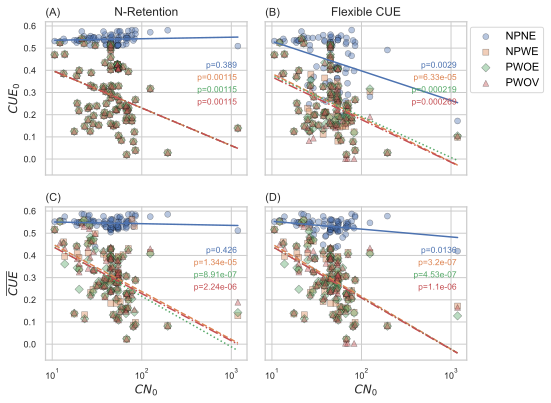

In [12]:
sns.set_style('whitegrid')

df_perf_matrix_new=df_perf_matrix.copy()
df_perf_matrix_new.loc[df_perf_matrix_new["Study"] == 'McKee et al., 2016', 'C:N'] = 44.3 / 1.47  # from McKee et al., 2016
df_perf_matrix_new.loc[df_perf_matrix_new["Study"] == 'Mathers et al., 2007', 'C:N'] = 45 # Mathers et al., 2007 10.1016/j.soilbio.2006.11.009
df_perf_matrix_new = df_perf_matrix_new.dropna(subset=['C:N'])


from scipy.stats import linregress
import matplotlib.pyplot as plt
tstr= ['(A)', '(B)', '(C)', '(D)']
fig, ax = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey=True)
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'h', 'x']  # No HTML entities
colors = sns.color_palette(n_colors=len(model_name))

for i, yvar in enumerate(['CUE0', 'CUE_avg']):
    axrow = ax[i, :]
    for adapt_flag, axx in zip(['N-Retention', 'Flexible CUE'], axrow):
        for ls, mdnam, mk, color in zip(lstyle, model_name, markers, colors):
            temp = df_perf_matrix_new[
                (df_perf_matrix_new["model"] == mdnam) &
                (df_perf_matrix_new['Nlimitation_strategy'] == adapt_flag)
            ]

            x = temp['C:N']
            y = temp[yvar]
            logx = np.log10(x)

            # Scatter
            axx.scatter(x, y, marker=mk, edgecolor='black', label=mdnam, alpha=0.4, color=color, linewidth=0.5)

            # Linear regression in log-space
            slope, intercept, rval, pval, stderr = linregress(logx, y)
            xfit = np.linspace(x.min(), x.max(), 100)
            yfit = slope * np.log10(xfit) + intercept
            axx.plot(xfit, yfit, linestyle=ls, color=color, linewidth=1.5)

            # Annotate p-value
            axx.text(0.95, 0.7 - 0.08 * model_name.index(mdnam), 
                     f"p={pval:.3g}", 
                     color=color, transform=axx.transAxes, fontsize=8.5, ha='right')

            axx.set_xscale('log')
            # axx.set_xlabel(r"$CN_0$", fontsize=12)
            axx.tick_params(axis='both', labelsize=9)
            axx.set_ylabel("")

for axx, tt in zip(ax.flatten(), tstr):
    axx.set_title(tt, loc='left', fontsize=11)

ax[0,1].legend(loc='upper center', bbox_to_anchor=(1.2,1), fontsize=11,
                labelcolor='black', ncol=1, frameon=True)
ax[0,0].set_ylabel(r"${CUE}_0$", fontsize=12)
ax[1,0].set_ylabel(r"$\overline{CUE}$", fontsize=12)
ax[1,1].set_xlabel(r"$CN_0$", fontsize=12)
ax[1,0].set_xlabel(r"$CN_0$", fontsize=12)
ax[0,0].set_title('N-Retention')
ax[0,1].set_title('Flexible CUE')

plt.savefig("figs/Figure7.svg", dpi=300, bbox_inches='tight')
plt.savefig("figs/Figure7.png", dpi=300, bbox_inches='tight')
plt.tight_layout(pad=1.5)
plt.show()

### Figure8 scatter plot for eta0 and eta_avg vs. C:N 

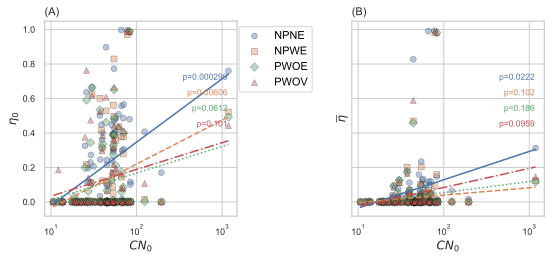

In [13]:

from scipy.stats import linregress
import matplotlib.pyplot as plt
tstr= ['(A)', '(B)', '(C)', '(D)']
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax=ax.flatten()
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'h', 'x']  # No HTML entities
colors = sns.color_palette(n_colors=len(model_name))

for i, yvar in enumerate(['eta0', 'eta_avg']):
    axx = ax[i]
    for ls, mdnam, mk, color in zip(lstyle, model_name, markers, colors):
        temp = df_perf_matrix_new[
            (df_perf_matrix_new["model"] == mdnam) &
            (df_perf_matrix_new['Nlimitation_strategy'] == 'N-Retention')
        ]

        if temp.empty or temp['C:N'].isnull().any():
            continue

        x = temp['C:N']
        y = temp[yvar]
        # mask = y > 0
        # x = x[mask]
        # y = y[mask]
        logx = np.log10(x)

        # Scatter
        axx.scatter(x, y, marker=mk, edgecolor='black', label=mdnam, alpha=0.4, color=color, linewidth=0.5)

        # Linear regression in log-space
        slope, intercept, rval, pval, stderr = linregress(logx, y)
        xfit = np.linspace(x.min(), x.max(), 100)
        yfit = slope * np.log10(xfit) + intercept
        axx.plot(xfit, yfit, linestyle=ls, color=color, linewidth=1.5)

        # Annotate p-value
        axx.text(0.95, 0.7 - 0.08 * model_name.index(mdnam), 
                    f"p={pval:.3g}", 
                    color=color, transform=axx.transAxes, fontsize=8.5, ha='right')

        axx.set_xscale('log'); 
        # axx.set_yscale('log')

        # axx.set_xlabel(r"$CN_0$", fontsize=12)
        axx.tick_params(axis='both', labelsize=9)
        axx.set_ylabel("")

for axx, tt in zip(ax.flatten(), tstr):
    axx.set_title(tt, loc='left', fontsize=11)

ax[0].legend(loc='upper center', bbox_to_anchor=(1.2,1), fontsize=11,
                labelcolor='black', ncol=1, frameon=True)
ax[0].set_ylabel(r"${\eta}_0$", fontsize=12)
ax[1].set_ylabel(r"$\overline{\eta}$", fontsize=12)
ax[0].set_xlabel(r"$CN_0$", fontsize=12)
ax[1].set_xlabel(r"$CN_0$", fontsize=12)

# plt.savefig("figs/Figure8.svg", dpi=300, bbox_inches='tight')
# plt.savefig("figs/Figure8.png", dpi=300, bbox_inches='tight')
plt.tight_layout(pad=1.5)
plt.show()